# Stock Data Analysis and Visualization

## Overview
This project analyzes stock data for the last 5 years (2019 - Present) and visualizes:
1. Closing price trends (line chart).
2. Average annual returns (bar chart).
3. Stock correlations (heatmap).

In [1]:
# Import necessary libraries
import pandas as pd
import glob
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

# Set plot styles
%matplotlib inline
plt.style.use('seaborn-darkgrid')


/var/folders/z_/38c5mnf16clfdzd6yhwyxg380000gn/T/ipykernel_60787/1187840771.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [3]:
# Define the path to your data files
data_path = '/Users/sonalgupta/DS4200/stocks/'  # Adjust the path if necessary

# Get a list of all CSV files in the data directory
file_paths = glob.glob(data_path + '*.csv')

# Create an empty list to store DataFrames
data_list = []

# Loop through each file and read the data
for file in file_paths:
    # Extract the stock symbol from the filename
    stock_name = file.split('/')[-1].split('.')[0]  # Adjust if using Windows ('\\' instead of '/')
    # Read the CSV file
    df = pd.read_csv(file)
    # Add a column for the stock symbol
    df['Stock'] = stock_name
    # Append the DataFrame to the list
    data_list.append(df)

# Combine all DataFrames into one
all_stock_data = pd.concat(data_list, ignore_index=True)

# Preview the combined DataFrame
all_stock_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Stock
0,2019-03-14,119.230003,120.940002,119.230003,120.349998,114.750084,29900,ADDYY
1,2019-03-15,120.269997,120.800003,119.699997,120.410004,114.807297,24700,ADDYY
2,2019-03-18,117.500000,118.190002,116.989998,118.089996,112.595238,24100,ADDYY
3,2019-03-19,120.500000,120.550003,118.750000,119.099998,113.558250,31300,ADDYY
4,2019-03-20,120.000000,120.639999,119.099998,119.919998,114.340088,33100,ADDYY


In [4]:
# Convert 'Date' to datetime format
all_stock_data['Date'] = pd.to_datetime(all_stock_data['Date'])

# Filter data for the last 5 years (from 2019-01-01 to today)
start_date = datetime(2019, 1, 1)
end_date = datetime.now()
filtered_data = all_stock_data[(all_stock_data['Date'] >= start_date) & (all_stock_data['Date'] <= end_date)].copy()

# Check for missing values
print(filtered_data.isnull().sum())

# Drop rows with missing values (if any)
filtered_data.dropna(inplace=True)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Stock        0
dtype: int64


In [7]:
import altair as alt

# Disable the max rows limit
alt.data_transformers.disable_max_rows()

# Create the chart
line_chart = alt.Chart(filtered_data).mark_line().encode(
    x='Date:T',
    y='Close:Q',
    color='Stock:N',
    tooltip=['Date:T', 'Stock:N', 'Close:Q']
).properties(
    title='Closing Prices of Stocks (2019 - Present)',
    width=800,
    height=400
).interactive()

line_chart


alt.Chart(...)

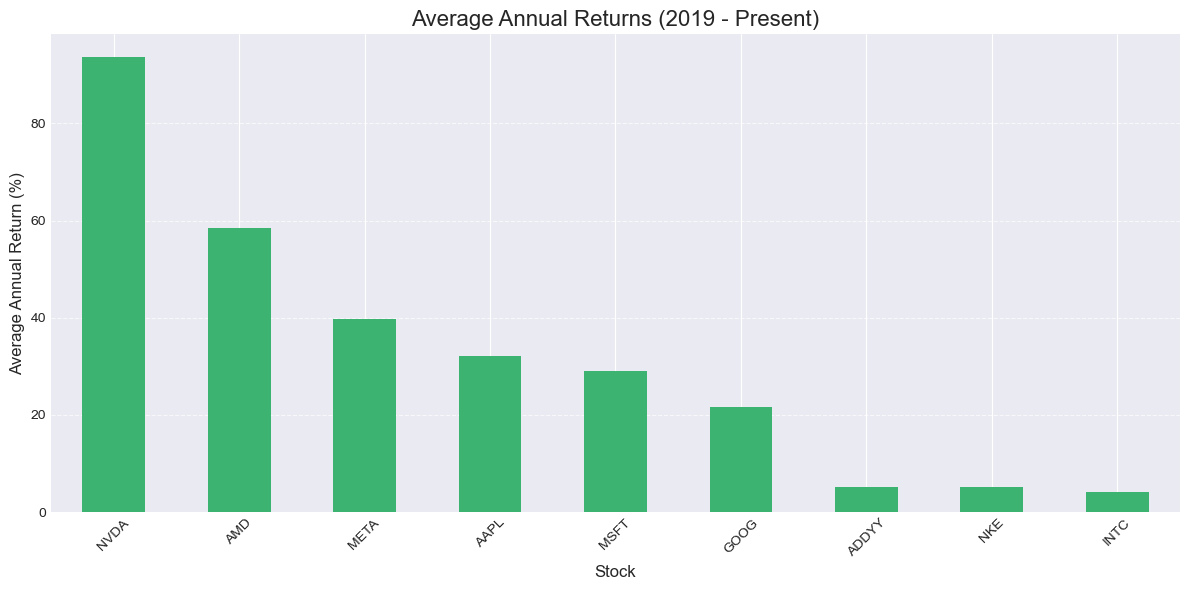

In [8]:
# Add 'Year' column
filtered_data['Year'] = filtered_data['Date'].dt.year

# Calculate annual returns
annual_returns = filtered_data.groupby(['Year', 'Stock'])['Close'].apply(
    lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100
).reset_index()

# Calculate average annual returns
average_annual_returns = annual_returns.groupby('Stock')['Close'].mean()

# Plot the bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
average_annual_returns.sort_values(ascending=False).plot(kind='bar', color='mediumseagreen')
plt.title('Average Annual Returns (2019 - Present)', fontsize=16)
plt.xlabel('Stock', fontsize=12)
plt.ylabel('Average Annual Return (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


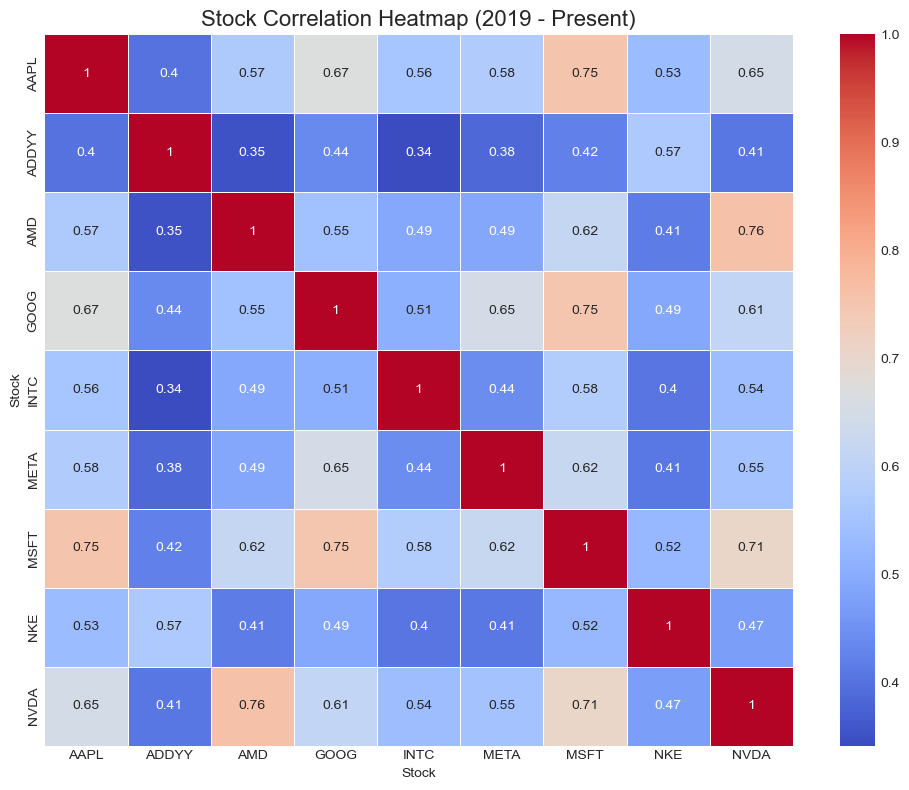

In [9]:
import seaborn as sns

# Pivot data to create a matrix of closing prices
pivot_data = filtered_data.pivot(index='Date', columns='Stock', values='Close')

# Calculate daily returns
returns = pivot_data.pct_change().dropna()

# Calculate correlation matrix
correlation_matrix = returns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Stock Correlation Heatmap (2019 - Present)', fontsize=16)
plt.tight_layout()
plt.show()
